In [ ]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import sklearn.tree as tree

pd.options.mode.chained_assignment = None

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**PROJECT DESCRIPTION: We will use NBA pergame statistics from the 2018-19, 2019-20, and 2020-21 seaons to predict salary data for the 2021-22 season. This will allow us to see which players are overvalued or undervalued. We will use a variety of different predictive model strategies and compare results.**

Data is from https://www.basketball-reference.com/ </br>
Inflation rates are from https://www.in2013dollars.com/

**LOADING DATASETS**

In [ ]:
pergame_2018_19 = pd.read_csv("pergame_stats_2018-2019.csv")
pergame_2018_19

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,abrinal01
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7,acyqu01
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,adamsja01
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,adamsst01
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,adebaba01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,528,Tyler Zeller,C,29,MEM,4,1,20.5,4.0,7.0,...,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5,zellety01
704,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8,zizican01
705,530,Ivica Zubac,C,21,TOT,59,37,17.6,3.6,6.4,...,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9,zubaciv01
706,530,Ivica Zubac,C,21,LAL,33,12,15.6,3.4,5.8,...,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5,zubaciv01


In [ ]:
pergame_2019_20 = pd.read_csv("pergame_stats_2019-2020.csv")
pergame_2019_20

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,adamsst01
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,aldrila01
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,alexaky01
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,youngtr01
647,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,zelleco01
648,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0,zellety01
649,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,...,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4,zizican01


In [ ]:
pergame_2020_21 = pd.read_csv("pergame_stats_2020-2021.csv")
pergame_2020_21

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,adamsja01
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,adamsst01
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,adebaba01
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,aldrila01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,wrighde01
701,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,youngth01
702,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,youngtr01
703,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,zelleco01


In [ ]:
pergame_2021_22 = pd.read_csv("pergame_stats_2021-2022.csv")
pergame_2021_22

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,adamsst01
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,adebaba01
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,aldamsa01
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,aldrila01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,youngth01
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,youngtr01
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,yurtsom01
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,zelleco01


In [ ]:
salaries_2018_19 = pd.read_csv("salaries_2018-2019.csv")
salaries_2018_19

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry\curryst01,GSW,$37457154,$40231758,$43006362,$45780966,NaN,NaN,Bird Rights,$166476240
2,2,Chris Paul\paulch01,HOU,$35654150,$38506482,$41358814,$44211146,NaN,NaN,NaN,$159730592
3,3,Russell Westbrook\westbru01,OKC,$35654150,$38178000,$41006000,$43848000,$46662000,NaN,Bird Rights,$158686150
4,4,LeBron James\jamesle01,LAL,$35654150,$37436858,$39219565,$41002273,NaN,NaN,NaN,$113310573
...,...,...,...,...,...,...,...,...,...,...,...
480,480,Troy Williams\willitr02,HOU,$122741,$122741,$122741,$122741,$122741,NaN,NaN,$613705
481,481,Demetrius Jackson\jacksde01,BOS,$92857,$92857,$92857,$92857,$92857,NaN,NaN,$557142
482,482,Shaquille Harrison\harrish01,PHO,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000
483,483,Garlon Green\greenga02,NOP,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000


In [ ]:
salaries_2019_20 = pd.read_csv("salaries_2019-2020.csv")
salaries_2019_20

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,Signed Using,Guaranteed
1,1,Stephen Curry\curryst01,GSW,$37457154,$40231758,$43006362,$45780966,NaN,NaN,Bird Rights,$166476240
2,2,LeBron James\jamesle01,LAL,$35654150,$37436858,$39219565,$41002273,NaN,NaN,NaN,$112310573
3,3,Russell Westbrook\westbru01,OKC,$35654150,$38178000,$41006000,$43848000,$46662000,NaN,Bird Rights,$35654150
4,4,Chris Paul\paulch01,HOU,$35654150,$38506482,$41358814,$44211146,NaN,NaN,NaN,$35654150
...,...,...,...,...,...,...,...,...,...,...,...
584,584,Tarik Phillip\phillta01,WAS,$9474,$1443842,NaN,NaN,NaN,NaN,NaN,$9474
585,585,Terry Larrier\larrite01,DAL,$6000,NaN,NaN,NaN,NaN,NaN,NaN,$6000
586,586,Theo Pinson\pinsoth01,BRK,$4737,NaN,NaN,NaN,NaN,NaN,Two-Way Contract,$1450434
587,587,Kendrick Nunn\nunnke01,MIA,$4737,$1416852,$1663861,NaN,NaN,NaN,NaN,$4737


In [ ]:
salaries_2020_21 = pd.read_csv("salaries_2020-2021.csv")
salaries_2020_21

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,Guaranteed
1,1,Stephen Curry\curryst01,GSW,$40231758,$43006362,$45780966,NaN,NaN,NaN,Bird Rights,$129019086
2,2,Chris Paul\paulch01,OKC,$38506482,$41358814,$44211146,NaN,NaN,NaN,Bird Rights,$79865296
3,3,Russell Westbrook\westbru01,HOU,$38178000,$41006000,$43848000,$46662000,NaN,NaN,Bird Rights,$123032000
4,4,John Wall\walljo01,WAS,$37800000,$40824000,$43848000,$46872000,NaN,NaN,Bird Rights,$122472000
...,...,...,...,...,...,...,...,...,...,...,...
564,564,William Howard\howarwi01,UTA,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000
565,565,Isaiah Taylor\taylois01,TOR,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000
566,566,Tyler Lydon\lydonty01,SAC,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000
567,567,Hollis Thompson\thompho01,SAC,$50000,NaN,NaN,NaN,NaN,NaN,NaN,$50000


In [ ]:
salaries_2021_22 = pd.read_csv("salaries_2021-2022.csv")
salaries_2021_22

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Salary,Salary.1,Salary.2,Salary.3,Salary.4,Salary.5,Unnamed: 9,Unnamed: 10
0,Rk,Player,Tm,2021-22,2022-23,2023-24,2024-25,2025-26,2026-27,Signed Using,Guaranteed
1,1,Stephen Curry\curryst01,GSW,$45780966,$48070014,$51915615,$55761216,$59606817,NaN,Bird Rights,$261134628
2,2,John Wall\walljo01,HOU,$44310840,$47366760,NaN,NaN,NaN,NaN,Bird Rights,$44310840
3,3,Russell Westbrook\westbru01,LAL,$44211146,$47063478,NaN,NaN,NaN,NaN,Bird Rights,$44211146
4,4,James Harden\hardeja01,PHI,$43848000,$46872000,NaN,NaN,NaN,NaN,Bird Rights,$43848000
...,...,...,...,...,...,...,...,...,...,...,...
532,532,Emanuel Terry\terryem01,PHO,$85578,NaN,NaN,NaN,NaN,NaN,Minimum Salary,$85578
533,533,Tyrell Terry\terryty01,MEM,$1517981,$1782621,NaN,NaN,NaN,NaN,NaN,$85578
534,534,Admiral Schofield\schofad01,ORL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$169706
535,535,Malcolm Hill\hillma01,CHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$53176


**CLEANING DATA**

**Pergame data**
1. Drop rows with missing values
2. Drop unnecessary columns (Rk and Player-additional)
3. Team = 'TOT' means a player played for multiple teams that season, we will keep these rows and drop the rows containing stats of partial seasons with different teams for these players

In [ ]:
pergame_2018_19 = pergame_2018_19.dropna()
pergame_2018_19 = pergame_2018_19.drop(columns=["Rk", "Player-additional"])
pergame_2018_19 = pergame_2018_19.sort_values(by='G', ascending=False).groupby('Player').first().reset_index()
pergame_2018_19

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,PF,23,ORL,78,78,33.8,6.0,13.4,0.449,...,0.731,1.7,5.7,7.4,3.7,0.7,0.7,2.1,2.2,16.0
1,Aaron Holiday,PG,22,IND,50,0,12.9,2.1,5.2,0.401,...,0.820,0.1,1.2,1.3,1.7,0.4,0.3,0.8,1.4,5.9
2,Abdel Nader,SF,25,OKC,61,1,11.4,1.5,3.5,0.423,...,0.750,0.2,1.7,1.9,0.3,0.3,0.2,0.4,1.1,4.0
3,Al Horford,C,32,BOS,68,68,29.0,5.7,10.6,0.535,...,0.821,1.8,5.0,6.7,4.2,0.9,1.3,1.5,1.9,13.6
4,Al-Farouq Aminu,PF,28,POR,81,81,28.3,3.2,7.3,0.433,...,0.867,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,Zach Collins,C,21,POR,77,0,17.6,2.5,5.2,0.473,...,0.746,1.4,2.8,4.2,0.9,0.3,0.9,1.0,2.3,6.6
471,Zach LaVine,SG,23,CHI,63,62,34.5,8.4,18.0,0.467,...,0.832,0.6,4.0,4.7,4.5,1.0,0.4,3.4,2.2,23.7
472,Zaza Pachulia,C,34,DET,68,3,12.9,1.3,2.8,0.440,...,0.782,1.5,2.4,3.9,1.3,0.5,0.3,0.8,2.2,3.9
473,Zhaire Smith,SG,19,PHI,6,2,18.5,2.3,5.7,0.412,...,0.750,0.5,1.7,2.2,1.7,0.3,0.3,1.0,1.3,6.7


In [ ]:
pergame_2019_20 = pergame_2019_20.dropna()
pergame_2019_20 = pergame_2019_20.drop(columns=["Rk", "Player-additional"])
pergame_2019_20 = pergame_2019_20.sort_values(by='G', ascending=False).groupby('Player').first().reset_index()
pergame_2019_20

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,...,0.674,1.7,5.9,7.7,3.7,0.8,0.6,1.6,2.0,14.4
1,Aaron Holiday,PG,23,IND,66,33,24.5,3.5,8.5,0.414,...,0.851,0.3,2.0,2.4,3.4,0.8,0.2,1.3,1.8,9.5
2,Abdel Nader,SF,26,OKC,55,6,15.8,2.2,4.8,0.468,...,0.773,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,6.3
3,Adam Mokoka,SF,21,CHI,11,0,10.2,1.1,2.5,0.429,...,0.500,0.6,0.3,0.9,0.4,0.4,0.0,0.2,1.5,2.9
4,Admiral Schofield,PF,22,WAS,33,2,11.2,1.1,2.8,0.380,...,0.667,0.2,1.2,1.4,0.5,0.2,0.1,0.2,1.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,Zach Collins,PF,22,POR,11,11,26.4,2.9,6.2,0.471,...,0.750,2.3,4.0,6.3,1.5,0.5,0.5,1.3,3.3,7.0
480,Zach LaVine,SF,24,CHI,60,60,34.8,9.0,20.0,0.450,...,0.802,0.7,4.1,4.8,4.2,1.5,0.5,3.4,2.2,25.5
481,Zach Norvell,SG,22,TOT,5,0,8.2,0.6,2.4,0.250,...,1.000,0.0,1.2,1.2,0.6,0.4,0.0,0.6,0.8,2.0
482,Zhaire Smith,SF,20,PHI,7,0,4.6,0.4,1.6,0.273,...,0.500,0.0,0.3,0.3,0.3,0.4,0.0,0.3,0.6,1.1


In [ ]:
pergame_2020_21 = pergame_2020_21.dropna()
pergame_2020_21 = pergame_2020_21.drop(columns=["Rk", "Player-additional"])
pergame_2020_21 = pergame_2020_21.sort_values(by='G', ascending=False).groupby('Player').first().reset_index()
pergame_2020_21

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,PF,25,TOT,50,50,27.7,4.6,10.0,0.463,...,0.651,1.5,4.1,5.7,3.2,0.7,0.7,1.9,1.8,12.4
1,Aaron Holiday,PG,24,IND,66,8,17.8,2.6,6.6,0.390,...,0.819,0.2,1.1,1.3,1.9,0.7,0.2,1.0,1.4,7.2
2,Aaron Nesmith,SF,21,BOS,46,1,14.5,1.7,3.9,0.438,...,0.786,0.6,2.2,2.8,0.5,0.3,0.2,0.5,1.9,4.7
3,Abdel Nader,SF,27,PHO,24,0,14.8,2.4,4.8,0.491,...,0.757,0.3,2.3,2.6,0.8,0.4,0.4,0.8,1.4,6.7
4,Adam Mokoka,SG,22,CHI,14,0,4.0,0.5,1.4,0.368,...,0.000,0.1,0.3,0.4,0.4,0.1,0.1,0.4,0.4,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,Yogi Ferrell,PG,27,TOT,10,0,13.6,2.0,5.7,0.351,...,0.778,0.5,1.4,1.9,2.2,0.7,0.3,0.3,1.1,5.6
499,Yuta Watanabe,SF,26,TOR,50,4,14.5,1.6,3.6,0.439,...,0.828,0.7,2.5,3.2,0.8,0.5,0.4,0.4,1.1,4.4
500,Zach LaVine,SG,25,CHI,58,58,35.1,9.8,19.4,0.507,...,0.849,0.6,4.4,5.0,4.9,0.8,0.5,3.5,2.4,27.4
501,Zeke Nnaji,PF,20,DEN,42,1,9.5,1.2,2.5,0.481,...,0.800,0.3,1.2,1.5,0.2,0.2,0.1,0.2,0.7,3.2


In [ ]:
pergame_2021_22 = pergame_2021_22.dropna()
pergame_2021_22 = pergame_2021_22.drop(columns=["Rk", "Player-additional"])
pergame_2021_22 = pergame_2021_22.sort_values(by='G', ascending=False).groupby('Player').first().reset_index()
pergame_2021_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,PF,26,DEN,75,75,31.7,5.8,11.1,0.520,...,0.743,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0
1,Aaron Holiday,PG,25,TOT,63,15,16.2,2.4,5.4,0.447,...,0.868,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3
2,Aaron Nesmith,SF,22,BOS,52,3,11.0,1.4,3.5,0.396,...,0.808,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8
3,Aaron Wiggins,SG,23,OKC,50,35,24.2,3.1,6.7,0.463,...,0.729,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3
4,Abdel Nader,SF,28,PHO,14,0,10.4,0.9,2.5,0.343,...,0.600,0.3,1.6,1.9,0.5,0.6,0.3,0.8,1.4,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Zach Collins,C,24,SAS,28,4,17.9,2.7,5.5,0.490,...,0.800,1.6,3.8,5.5,2.2,0.5,0.8,1.6,2.4,7.8
516,Zach LaVine,SG,26,CHI,67,67,34.7,8.4,17.7,0.476,...,0.853,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4
517,Zavier Simpson,PG,24,OKC,4,4,43.5,4.8,13.0,0.365,...,1.000,0.5,4.8,5.3,7.5,1.3,1.0,2.5,3.8,11.0
518,Zeke Nnaji,PF,21,DEN,41,1,17.0,2.3,4.5,0.516,...,0.631,1.4,2.2,3.6,0.4,0.4,0.3,0.6,1.9,6.6


**Salary data**
1. Drop rows with missing values
2. Only columns we need are the name and the salary of the most recent year, drop other columns
3. Rename columns appropriately
4. Drop first row
5. Clean player names
6. Clean salary values
7. Adjust salary values for inflation
8. Some players may have switched teams and have duplicate contracts so we will only keep 1.
9. Let's try to use smaller numbers, so we'll scale salary values down in terms of millions


In [ ]:
inflation_18_to_21 = .0786
inflation_19_to_21 = .0599
inflation_20_to_21 = .0470

In [ ]:
salaries_2018_19 = salaries_2018_19[['Unnamed: 1', 'Salary']]
salaries_2018_19 = salaries_2018_19.dropna()
salaries_2018_19 = salaries_2018_19.rename(columns={'Unnamed: 1': 'Player', 'Unnamed: 3': 'Salary'})
salaries_2018_19 = salaries_2018_19.drop([0])
salaries_2018_19['Player'] = salaries_2018_19['Player'].apply(lambda x: x[0:x.index('\\')])
salaries_2018_19['Salary'] = salaries_2018_19['Salary'].apply(lambda x: x[1:]).apply(lambda x: int(x))
salaries_2018_19['Salary'] = salaries_2018_19['Salary'] * (1 + inflation_18_to_21) * .000001
salaries_2018_19 = salaries_2018_19.groupby('Player').first().reset_index()
salaries_2018_19['Salary'] = salaries_2018_19['Salary'].round(5)
salaries_2018_19

,Player,Salary
0,A.J. Hammons,0.37760
1,Aaron Gordon,23.28795
2,Aaron Holiday,2.06224
3,Abdel Nader,1.48657
4,Al Horford,31.20251
...,...,...
472,Zach LaVine,21.03270
473,Zach Randolph,12.61132
474,Zaza Pachulia,2.58205
475,Zhaire Smith,2.81709


In [ ]:
salaries_2019_20 = salaries_2019_20[['Unnamed: 1', 'Salary.1']]
salaries_2019_20 = salaries_2019_20.dropna()
salaries_2019_20 = salaries_2019_20.rename(columns={'Unnamed: 1': 'Player', 'Salary.1': 'Salary'})
salaries_2019_20 = salaries_2019_20.drop([0])
salaries_2019_20['Player'] = salaries_2019_20['Player'].apply(lambda x: x[0:x.index('\\')])
salaries_2019_20['Salary'] = salaries_2019_20['Salary'].apply(lambda x: x[1:]).apply(lambda x: int(x))
salaries_2019_20['Salary'] = salaries_2019_20['Salary'] * (1 + inflation_19_to_21) * .000001
salaries_2019_20 = salaries_2019_20.groupby('Player').first().reset_index()
salaries_2019_20['Salary'] = salaries_2019_20['Salary'].round(5)
salaries_2019_20

,Player,Salary
0,A.J. Hammons,0.37106
1,Aaron Gordon,21.05347
2,Aaron Holiday,2.37333
3,Abdel Nader,1.71547
4,Alex Len,4.40918
...,...,...
285,Zach Collins,4.49419
286,Zach LaVine,20.66805
287,Zhaire Smith,3.24202
288,Élie Okobo,1.50172


In [ ]:
salaries_2020_21 = salaries_2020_21[['Unnamed: 1', 'Salary.1']]
salaries_2020_21 = salaries_2020_21.dropna()
salaries_2020_21 = salaries_2020_21.rename(columns={'Unnamed: 1': 'Player', 'Salary.1': 'Salary'})
salaries_2020_21 = salaries_2020_21.drop([0])
salaries_2020_21['Player'] = salaries_2020_21['Player'].apply(lambda x: x[0:x.index('\\')])
salaries_2020_21['Salary'] = salaries_2020_21['Salary'].apply(lambda x: x[1:]).apply(lambda x: int(x))
salaries_2020_21['Salary'] = salaries_2020_21['Salary'] * (1 + inflation_20_to_21) * .000001
salaries_2020_21 = salaries_2020_21.groupby('Player').first().reset_index()
salaries_2020_21['Salary'] = salaries_2020_21['Salary'].round(2)
salaries_2020_21

,Player,Salary
0,A.J. Hammons,0.37
1,Aaron Gordon,18.99
2,Aaron Holiday,2.46
3,Abdel Nader,1.84
4,Admiral Schofield,1.59
...,...,...
343,Willie Cauley-Stein,2.39
344,Zach Collins,5.66
345,Zach LaVine,20.42
346,Zhaire Smith,3.36


In [ ]:
salaries_2021_22 = salaries_2021_22[['Unnamed: 1', 'Salary']]
salaries_2021_22 = salaries_2021_22.dropna()
salaries_2021_22 = salaries_2021_22.rename(columns={'Unnamed: 1': 'Player', 'Unnamed: 3': 'Salary'})
salaries_2021_22 = salaries_2021_22.drop([0])
salaries_2021_22['Player'] = salaries_2021_22['Player'].apply(lambda x: x[0:x.index('\\')])
salaries_2021_22['Salary'] = salaries_2021_22['Salary'].apply(lambda x: x[1:]).apply(lambda x: int(x))
salaries_2021_22['Salary'] = salaries_2021_22['Salary'] * .000001 
salaries_2021_22 = salaries_2021_22.groupby('Player').first().reset_index() 
salaries_2021_22['Salary'] = salaries_2021_22['Salary'].round(5)
salaries_2021_22

,Player,Salary
0,Aaron Gordon,16.40909
1,Aaron Holiday,3.98055
2,Aaron Nesmith,3.63120
3,Aaron Wiggins,1.00000
4,Abdel Nader,2.00000
...,...,...
469,Zach Collins,6.98413
470,Zach LaVine,19.50000
471,Zeke Nnaji,2.49876
472,Ziaire Williams,4.37316


**Merging data sets** </br>
Luckily, from 2018-2022, no players with identical first and last names played in the NBA at the same time. We can merge pergame data now with salary data. Note that some players had missing data, so we will only include players with both pergame statistics and salary data.

In [ ]:
data_2018_19 = pd.merge(pergame_2018_19, salaries_2018_19, how="inner", on="Player")
data_2018_19

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Aaron Gordon,PF,23,ORL,78,78,33.8,6.0,13.4,0.449,...,1.7,5.7,7.4,3.7,0.7,0.7,2.1,2.2,16.0,23.28795
1,Aaron Holiday,PG,22,IND,50,0,12.9,2.1,5.2,0.401,...,0.1,1.2,1.3,1.7,0.4,0.3,0.8,1.4,5.9,2.06224
2,Abdel Nader,SF,25,OKC,61,1,11.4,1.5,3.5,0.423,...,0.2,1.7,1.9,0.3,0.3,0.2,0.4,1.1,4.0,1.48657
3,Al Horford,C,32,BOS,68,68,29.0,5.7,10.6,0.535,...,1.8,5.0,6.7,4.2,0.9,1.3,1.5,1.9,13.6,31.20251
4,Al-Farouq Aminu,PF,28,POR,81,81,28.3,3.2,7.3,0.433,...,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4,7.50393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Yogi Ferrell,PG,25,SAC,71,3,15.0,2.2,5.0,0.435,...,0.2,1.4,1.5,1.9,0.5,0.1,0.6,0.9,5.9,3.23580
363,Zach Collins,C,21,POR,77,0,17.6,2.5,5.2,0.473,...,1.4,2.8,4.2,0.9,0.3,0.9,1.0,2.3,6.6,3.91415
364,Zach LaVine,SG,23,CHI,63,62,34.5,8.4,18.0,0.467,...,0.6,4.0,4.7,4.5,1.0,0.4,3.4,2.2,23.7,21.03270
365,Zaza Pachulia,C,34,DET,68,3,12.9,1.3,2.8,0.440,...,1.5,2.4,3.9,1.3,0.5,0.3,0.8,2.2,3.9,2.58205


In [ ]:
data_2019_20 = pd.merge(pergame_2019_20, salaries_2019_20, how="inner", on="Player")
data_2019_20

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Aaron Gordon,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,...,1.7,5.9,7.7,3.7,0.8,0.6,1.6,2.0,14.4,21.05347
1,Aaron Holiday,PG,23,IND,66,33,24.5,3.5,8.5,0.414,...,0.3,2.0,2.4,3.4,0.8,0.2,1.3,1.8,9.5,2.37333
2,Abdel Nader,SF,26,OKC,55,6,15.8,2.2,4.8,0.468,...,0.3,1.6,1.8,0.7,0.4,0.4,0.8,1.4,6.3,1.71547
3,Alex Len,C,26,TOT,55,12,17.6,3.2,5.8,0.555,...,1.8,4.0,5.8,0.9,0.4,0.9,1.0,2.3,8.0,4.40918
4,Alfonzo McKinnie,SF,27,CLE,40,1,14.8,1.8,4.3,0.427,...,0.9,1.9,2.8,0.4,0.6,0.2,0.7,1.8,4.6,1.68337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Willy Hernangómez,C,25,CHO,31,0,12.1,2.4,4.5,0.532,...,1.4,2.9,4.3,0.9,0.3,0.2,1.0,1.0,6.1,1.77713
223,Yogi Ferrell,PG,26,SAC,50,0,10.6,1.6,3.8,0.420,...,0.1,0.9,1.0,1.4,0.4,0.1,0.6,0.8,4.4,3.33868
224,Zach Collins,PF,22,POR,11,11,26.4,2.9,6.2,0.471,...,2.3,4.0,6.3,1.5,0.5,0.5,1.3,3.3,7.0,4.49419
225,Zach LaVine,SF,24,CHI,60,60,34.8,9.0,20.0,0.450,...,0.7,4.1,4.8,4.2,1.5,0.5,3.4,2.2,25.5,20.66805


In [ ]:
data_2020_21 = pd.merge(pergame_2020_21, salaries_2020_21, how="inner", on="Player")
data_2020_21

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Aaron Gordon,PF,25,TOT,50,50,27.7,4.6,10.0,0.463,...,1.5,4.1,5.7,3.2,0.7,0.7,1.9,1.8,12.4,18.99
1,Aaron Holiday,PG,24,IND,66,8,17.8,2.6,6.6,0.390,...,0.2,1.1,1.3,1.9,0.7,0.2,1.0,1.4,7.2,2.46
2,Abdel Nader,SF,27,PHO,24,0,14.8,2.4,4.8,0.491,...,0.3,2.3,2.6,0.8,0.4,0.4,0.8,1.4,6.7,1.84
3,Al Horford,C,34,OKC,28,28,27.9,5.8,12.9,0.450,...,1.0,5.7,6.7,3.4,0.9,0.9,1.0,1.7,14.2,28.79
4,Al-Farouq Aminu,PF,30,TOT,23,14,18.9,1.7,4.3,0.384,...,1.0,3.8,4.8,1.3,0.8,0.4,1.2,1.3,4.4,10.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Wesley Matthews,SG,34,LAL,58,10,19.5,1.5,4.3,0.353,...,0.3,1.3,1.6,0.9,0.7,0.3,0.4,1.4,4.8,2.82
277,Will Barton,SF,30,DEN,56,52,31.0,4.6,10.9,0.426,...,0.7,3.3,4.0,3.2,0.9,0.4,1.7,1.7,12.7,14.57
278,Willie Cauley-Stein,C,27,DAL,53,16,17.1,2.2,3.4,0.632,...,1.2,3.2,4.5,0.7,0.4,0.8,0.5,2.4,5.3,2.39
279,Zach LaVine,SG,25,CHI,58,58,35.1,9.8,19.4,0.507,...,0.6,4.4,5.0,4.9,0.8,0.5,3.5,2.4,27.4,20.42


In [ ]:
data_2021_22 = pd.merge(pergame_2021_22, salaries_2021_22, how="inner", on="Player")
data_2021_22

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,Aaron Gordon,PF,26,DEN,75,75,31.7,5.8,11.1,0.520,...,1.7,4.2,5.9,2.5,0.6,0.6,1.8,2.0,15.0,16.40909
1,Aaron Holiday,PG,25,TOT,63,15,16.2,2.4,5.4,0.447,...,0.4,1.6,1.9,2.4,0.7,0.1,1.1,1.5,6.3,3.98055
2,Aaron Nesmith,SF,22,BOS,52,3,11.0,1.4,3.5,0.396,...,0.3,1.4,1.7,0.4,0.4,0.1,0.6,1.3,3.8,3.63120
3,Aaron Wiggins,SG,23,OKC,50,35,24.2,3.1,6.7,0.463,...,1.0,2.5,3.6,1.4,0.6,0.2,1.1,1.9,8.3,1.00000
4,Abdel Nader,SF,28,PHO,14,0,10.4,0.9,2.5,0.343,...,0.3,1.6,1.9,0.5,0.6,0.3,0.8,1.4,2.4,2.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Yuta Watanabe,SF,27,TOR,38,4,11.7,1.5,3.6,0.406,...,0.5,1.9,2.4,0.6,0.3,0.4,0.5,1.0,4.3,1.76277
422,Zach Collins,C,24,SAS,28,4,17.9,2.7,5.5,0.490,...,1.6,3.8,5.5,2.2,0.5,0.8,1.6,2.4,7.8,6.98413
423,Zach LaVine,SG,26,CHI,67,67,34.7,8.4,17.7,0.476,...,0.3,4.3,4.6,4.5,0.6,0.3,2.6,1.8,24.4,19.50000
424,Zeke Nnaji,PF,21,DEN,41,1,17.0,2.3,4.5,0.516,...,1.4,2.2,3.6,0.4,0.4,0.3,0.6,1.9,6.6,2.49876


**One more merge** </br>
Compile all our test data (data from 2018-19, 2019-20, and 2020-21) together. We can add a year identifier for each player since we may have up to 3 rows of data for a player now.

In [ ]:
data_2018_19['Player'] = data_2018_19['Player'] + ", Yr: 18-19"
data_2019_20['Player'] = data_2019_20['Player'] + ", Yr: 19-20"
data_2020_21['Player'] = data_2020_21['Player'] + ", Yr: 20-21"
test_data = pd.concat([data_2018_19, data_2019_20, data_2020_21])
test_data

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,"Aaron Gordon, Yr: 18-19",PF,23,ORL,78,78,33.8,6.0,13.4,0.449,...,1.7,5.7,7.4,3.7,0.7,0.7,2.1,2.2,16.0,23.28795
1,"Aaron Holiday, Yr: 18-19",PG,22,IND,50,0,12.9,2.1,5.2,0.401,...,0.1,1.2,1.3,1.7,0.4,0.3,0.8,1.4,5.9,2.06224
2,"Abdel Nader, Yr: 18-19",SF,25,OKC,61,1,11.4,1.5,3.5,0.423,...,0.2,1.7,1.9,0.3,0.3,0.2,0.4,1.1,4.0,1.48657
3,"Al Horford, Yr: 18-19",C,32,BOS,68,68,29.0,5.7,10.6,0.535,...,1.8,5.0,6.7,4.2,0.9,1.3,1.5,1.9,13.6,31.20251
4,"Al-Farouq Aminu, Yr: 18-19",PF,28,POR,81,81,28.3,3.2,7.3,0.433,...,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4,7.50393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,"Wesley Matthews, Yr: 20-21",SG,34,LAL,58,10,19.5,1.5,4.3,0.353,...,0.3,1.3,1.6,0.9,0.7,0.3,0.4,1.4,4.8,2.82000
277,"Will Barton, Yr: 20-21",SF,30,DEN,56,52,31.0,4.6,10.9,0.426,...,0.7,3.3,4.0,3.2,0.9,0.4,1.7,1.7,12.7,14.57000
278,"Willie Cauley-Stein, Yr: 20-21",C,27,DAL,53,16,17.1,2.2,3.4,0.632,...,1.2,3.2,4.5,0.7,0.4,0.8,0.5,2.4,5.3,2.39000
279,"Zach LaVine, Yr: 20-21",SG,25,CHI,58,58,35.1,9.8,19.4,0.507,...,0.6,4.4,5.0,4.9,0.8,0.5,3.5,2.4,27.4,20.42000


**DEALING WITH CATEGORICAL VARIABLES**

We have some categorical variables, namely Position and Team, so let's first transform these using a one hot encoding.

Some players play more than 1 position, so let's deal with this first.

In [ ]:
test_data['Pos'].unique()

array(['PF', 'PG', 'SF', 'C', 'SG', 'PF-SF', 'PF-C', 'SF-SG', 'SG-SF',
       'SG-PF', 'C-PF', 'SG-PG', 'SF-PF', 'PG-SG'], dtype=object)

In [ ]:
pos_lst = ['PF', 'PG', 'SF', 'C', 'SG']
test_two_pos_players = test_data[test_data['Pos'].apply(lambda x: x not in pos_lst)]
test_one_pos_players = test_data[test_data['Pos'].apply(lambda x: x in pos_lst)]

# manually one hot encode two position players
for pos in pos_lst:
  key = "Pos_" + pos
  test_two_pos_players[key] = test_two_pos_players['Pos'].apply(lambda x: 1 if x[0:2] == pos or x[3:] == pos else 0)

test_two_pos_players = test_two_pos_players.drop(columns=['Pos'])
test_two_pos_players

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,BLK,TOV,PF,PTS,Salary,Pos_PF,Pos_PG,Pos_SF,Pos_C,Pos_SG
122,"Harrison Barnes, Yr: 18-19",26,TOT,77,77,32.9,5.6,13.3,0.420,2.3,...,0.2,1.3,1.6,16.4,26.00209,1,0,1,0,0
155,"Jason Smith, Yr: 18-19",32,TOT,20,1,9.5,1.1,3.0,0.356,0.5,...,0.4,0.7,1.5,3.3,5.87837,1,0,0,1,0
167,"Jimmy Butler, Yr: 18-19",29,TOT,65,65,33.6,6.4,13.9,0.462,1.0,...,0.6,1.5,1.7,18.7,22.05282,0,0,1,0,1
179,"Jonathon Simmons, Yr: 18-19",29,TOT,56,9,19.0,2.4,6.3,0.380,0.5,...,0.3,1.2,1.6,6.5,6.47160,0,0,1,0,1
213,"Kyle Korver, Yr: 18-19",37,TOT,70,0,19.1,2.9,6.9,0.416,2.0,...,0.2,0.8,1.5,8.6,8.15422,1,0,0,0,1
331,"Thon Maker, Yr: 18-19",21,TOT,64,5,15.2,1.7,4.2,0.407,0.8,...,0.8,0.5,1.6,5.0,3.01978,0,0,0,0,0
358,"Wesley Matthews, Yr: 18-19",32,TOT,69,68,30.3,4.0,10.1,0.400,2.2,...,0.2,1.3,2.3,12.2,20.08624,0,0,1,0,1
361,"Wilson Chandler, Yr: 18-19",31,TOT,51,33,23.1,2.2,5.4,0.418,1.2,...,0.4,0.9,2.4,6.0,13.80669,1,0,1,0,0
6,"Allen Crabbe, Yr: 19-20",27,TOT,37,1,17.6,1.7,4.8,0.356,1.0,...,0.1,0.5,1.3,4.6,19.60815,0,0,1,0,1
22,"Brandon Knight, Yr: 19-20",28,TOT,25,3,18.5,2.4,6.7,0.353,1.8,...,0.1,1.5,1.6,7.3,16.58081,0,1,0,0,1


In [ ]:
test_one_pos_players = pd.concat([test_one_pos_players, pd.get_dummies(test_one_pos_players['Pos'], prefix="Pos")], axis=1).drop(columns=['Pos'])
test_one_pos_players

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,BLK,TOV,PF,PTS,Salary,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,"Aaron Gordon, Yr: 18-19",23,ORL,78,78,33.8,6.0,13.4,0.449,1.6,...,0.7,2.1,2.2,16.0,23.28795,0,1,0,0,0
1,"Aaron Holiday, Yr: 18-19",22,IND,50,0,12.9,2.1,5.2,0.401,0.9,...,0.3,0.8,1.4,5.9,2.06224,0,0,1,0,0
2,"Abdel Nader, Yr: 18-19",25,OKC,61,1,11.4,1.5,3.5,0.423,0.5,...,0.2,0.4,1.1,4.0,1.48657,0,0,0,1,0
3,"Al Horford, Yr: 18-19",32,BOS,68,68,29.0,5.7,10.6,0.535,1.1,...,1.3,1.5,1.9,13.6,31.20251,1,0,0,0,0
4,"Al-Farouq Aminu, Yr: 18-19",28,POR,81,81,28.3,3.2,7.3,0.433,1.2,...,0.4,0.9,1.8,9.4,7.50393,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,"Wesley Matthews, Yr: 20-21",34,LAL,58,10,19.5,1.5,4.3,0.353,1.1,...,0.3,0.4,1.4,4.8,2.82000,0,0,0,0,1
277,"Will Barton, Yr: 20-21",30,DEN,56,52,31.0,4.6,10.9,0.426,1.8,...,0.4,1.7,1.7,12.7,14.57000,0,0,0,1,0
278,"Willie Cauley-Stein, Yr: 20-21",27,DAL,53,16,17.1,2.2,3.4,0.632,0.0,...,0.8,0.5,2.4,5.3,2.39000,1,0,0,0,0
279,"Zach LaVine, Yr: 20-21",25,CHI,58,58,35.1,9.8,19.4,0.507,3.4,...,0.5,3.5,2.4,27.4,20.42000,0,0,0,0,1


In [ ]:
test_data = pd.concat([test_one_pos_players, test_two_pos_players])
test_data = pd.concat([test_data, pd.get_dummies(test_data['Tm'])], axis=1).drop(columns=['Tm'])
test_data

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORL,PHI,PHO,POR,SAC,SAS,TOR,TOT,UTA,WAS
0,"Aaron Gordon, Yr: 18-19",23,78,78,33.8,6.0,13.4,0.449,1.6,4.4,...,1,0,0,0,0,0,0,0,0,0
1,"Aaron Holiday, Yr: 18-19",22,50,0,12.9,2.1,5.2,0.401,0.9,2.5,...,0,0,0,0,0,0,0,0,0,0
2,"Abdel Nader, Yr: 18-19",25,61,1,11.4,1.5,3.5,0.423,0.5,1.6,...,0,0,0,0,0,0,0,0,0,0
3,"Al Horford, Yr: 18-19",32,68,68,29.0,5.7,10.6,0.535,1.1,3.0,...,0,0,0,0,0,0,0,0,0,0
4,"Al-Farouq Aminu, Yr: 18-19",28,81,81,28.3,3.2,7.3,0.433,1.2,3.5,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,"Javonte Green, Yr: 20-21",27,41,2,11.5,1.3,2.5,0.520,0.2,0.7,...,0,0,0,0,0,0,0,1,0,0
157,"Kelly Olynyk, Yr: 20-21",29,70,62,28.5,4.8,10.0,0.484,1.8,5.3,...,0,0,0,0,0,0,0,1,0,0
184,"Luke Kornet, Yr: 20-21",25,31,2,11.2,1.4,3.3,0.436,0.5,1.9,...,0,0,0,0,0,0,0,1,0,0
212,"Norman Powell, Yr: 20-21",27,69,58,32.0,6.3,13.3,0.477,2.5,6.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
pos_lst = ['PF', 'PG', 'SF', 'C', 'SG']
target_two_pos_players = data_2021_22[data_2021_22['Pos'].apply(lambda x: x not in pos_lst)]
target_one_pos_players = data_2021_22[data_2021_22['Pos'].apply(lambda x: x in pos_lst)]

# manually one hot encode two position players
for pos in pos_lst:
  key = "Pos_" + pos
  target_two_pos_players[key] = target_two_pos_players['Pos'].apply(lambda x: 1 if x[0:2] == pos or x[3:] == pos else 0)

target_two_pos_players = target_two_pos_players.drop(columns=['Pos'])
target_two_pos_players

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,BLK,TOV,PF,PTS,Salary,Pos_PF,Pos_PG,Pos_SF,Pos_C,Pos_SG
20,Armoni Brooks,23,TOT,54,11,15.6,1.8,5.4,0.339,1.4,...,0.2,0.5,1.4,5.3,1.48906,0,1,0,0,1
97,Dennis Schröder,28,TOT,64,29,28.7,4.9,11.3,0.431,1.3,...,0.1,2.2,2.4,13.5,5.89000,0,1,0,0,1
108,Didi Louzada,22,TOT,9,1,14.3,1.3,3.7,0.364,1.0,...,0.2,0.6,1.4,3.9,1.78688,0,0,1,0,1
110,Domantas Sabonis,25,TOT,62,61,34.5,7.1,12.5,0.573,0.6,...,0.4,3.1,3.3,18.9,18.56250,1,0,0,1,0
123,Elijah Hughes,23,TOT,36,4,12.1,1.3,4.0,0.326,0.7,...,0.2,0.5,1.1,3.5,1.51798,0,0,1,0,1
203,Jeremy Lamb,29,TOT,56,0,16.7,2.4,6.2,0.383,1.0,...,0.4,0.7,1.1,7.3,10.50000,0,0,1,0,1
230,Justin Holiday,32,TOT,74,65,27.8,3.5,8.9,0.394,2.4,...,0.4,0.9,2.1,10.1,6.00642,0,0,1,0,1
268,Lance Stephenson,31,TOT,46,1,17.7,3.2,7.0,0.455,0.6,...,0.1,1.6,2.1,8.3,0.92473,0,1,0,0,1
270,Larry Nance Jr.,29,TOT,46,11,22.6,2.8,5.4,0.522,0.5,...,0.4,0.8,1.8,7.0,10.69091,0,0,0,0,0
321,Norman Powell,28,TOT,45,41,32.4,6.2,13.4,0.461,2.4,...,0.5,1.5,2.4,19.0,15.51724,0,0,1,0,1


In [ ]:
target_one_pos_players = pd.concat([target_one_pos_players, pd.get_dummies(target_one_pos_players['Pos'], prefix="Pos")], axis=1).drop(columns=['Pos'])
target_one_pos_players

,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,BLK,TOV,PF,PTS,Salary,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,Aaron Gordon,26,DEN,75,75,31.7,5.8,11.1,0.520,1.2,...,0.6,1.8,2.0,15.0,16.40909,0,1,0,0,0
1,Aaron Holiday,25,TOT,63,15,16.2,2.4,5.4,0.447,0.6,...,0.1,1.1,1.5,6.3,3.98055,0,0,1,0,0
2,Aaron Nesmith,22,BOS,52,3,11.0,1.4,3.5,0.396,0.6,...,0.1,0.6,1.3,3.8,3.63120,0,0,0,1,0
3,Aaron Wiggins,23,OKC,50,35,24.2,3.1,6.7,0.463,0.8,...,0.2,1.1,1.9,8.3,1.00000,0,0,0,0,1
4,Abdel Nader,28,PHO,14,0,10.4,0.9,2.5,0.343,0.3,...,0.3,0.8,1.4,2.4,2.00000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Yuta Watanabe,27,TOR,38,4,11.7,1.5,3.6,0.406,0.7,...,0.4,0.5,1.0,4.3,1.76277,0,0,0,1,0
422,Zach Collins,24,SAS,28,4,17.9,2.7,5.5,0.490,0.5,...,0.8,1.6,2.4,7.8,6.98413,1,0,0,0,0
423,Zach LaVine,26,CHI,67,67,34.7,8.4,17.7,0.476,2.8,...,0.3,2.6,1.8,24.4,19.50000,0,0,0,0,1
424,Zeke Nnaji,21,DEN,41,1,17.0,2.3,4.5,0.516,0.9,...,0.3,0.6,1.9,6.6,2.49876,0,1,0,0,0


In [ ]:
target_data = pd.concat([target_one_pos_players, target_two_pos_players])
target_data = pd.concat([target_data, pd.get_dummies(target_data['Tm'])], axis=1).drop(columns=['Tm'])
target_data

,Player,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORL,PHI,PHO,POR,SAC,SAS,TOR,TOT,UTA,WAS
0,Aaron Gordon,26,75,75,31.7,5.8,11.1,0.520,1.2,3.5,...,0,0,0,0,0,0,0,0,0,0
1,Aaron Holiday,25,63,15,16.2,2.4,5.4,0.447,0.6,1.6,...,0,0,0,0,0,0,0,1,0,0
2,Aaron Nesmith,22,52,3,11.0,1.4,3.5,0.396,0.6,2.2,...,0,0,0,0,0,0,0,0,0,0
3,Aaron Wiggins,23,50,35,24.2,3.1,6.7,0.463,0.8,2.8,...,0,0,0,0,0,0,0,0,0,0
4,Abdel Nader,28,14,0,10.4,0.9,2.5,0.343,0.3,1.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,Norman Powell,28,45,41,32.4,6.2,13.4,0.461,2.4,5.6,...,0,0,0,0,0,0,0,1,0,0
353,Rodney Hood,29,52,0,13.6,1.1,3.0,0.369,0.6,1.8,...,0,0,0,0,0,0,0,1,0,0
371,Spencer Dinwiddie,28,67,51,29.6,4.6,11.0,0.416,1.7,4.9,...,0,0,0,0,0,0,0,1,0,0
392,Tomáš Satoranský,30,55,13,16.5,1.3,3.5,0.377,0.2,1.0,...,0,0,0,0,0,0,0,1,0,0


**SOME CONSIDERATIONS** </br>
Let's keep players that play at least 15.0 minutes per game. There may be quite a lot of variation/unreliable data among players that don't get much playing time.

In [ ]:
test_data = test_data[test_data['MP'] >= 15.0]
target_data = target_data[target_data['MP'] >= 15.0]

**EXPLORATORY DATA ANALYSIS**

In [ ]:
test_data.columns

Index(['Player', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Salary', 'Pos_C',
       'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG', 'ATL', 'BOS', 'BRK', 'CHI',
       'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL',
       'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO',
       'POR', 'SAC', 'SAS', 'TOR', 'TOT', 'UTA', 'WAS'],
      dtype='object')

Is there a linear correlation between points per game and salary?

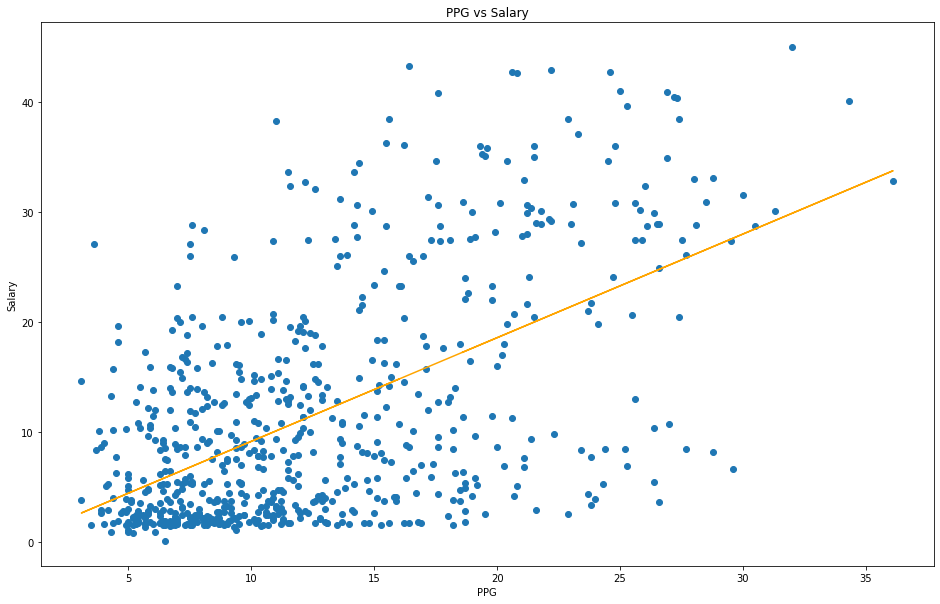

Linear Regression Slope (in Million $s per PPG increase) is: 0.94


In [ ]:
plt.figure(figsize=[16, 10]);
plt.scatter(x='PTS', y='Salary', data = test_data)
m, b = np.polyfit(test_data['PTS'], test_data['Salary'], 1) # regression line variables
plt.plot(test_data['PTS'], m*test_data['PTS']+b, color='orange') # plot linear regression line
plt.title("PPG vs Salary")
plt.xlabel("PPG")
plt.ylabel("Salary")
plt.show();
print("Linear Regression Slope (in Million $s per PPG increase) is:", round(m, 2))

What about assists per game?

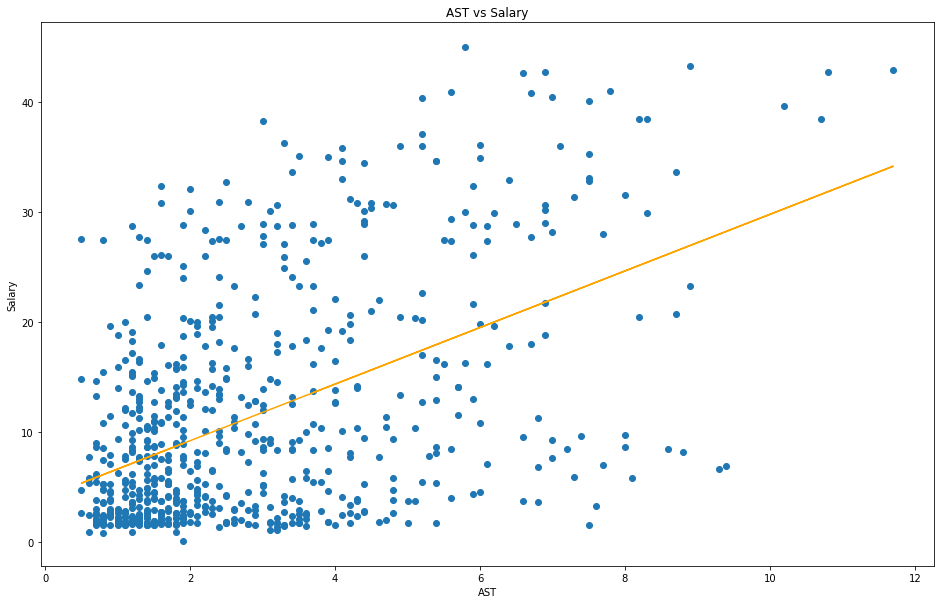

Linear Regression Slope (in Million $s per APG increase) is: 2.57


In [ ]:
plt.figure(figsize=[16, 10]);
plt.scatter(x='AST', y='Salary', data = test_data)
m, b = np.polyfit(test_data['AST'], test_data['Salary'], 1) # regression line variables
plt.plot(test_data['AST'], m*test_data['AST']+b, color='orange') # plot linear regression line
plt.title("AST vs Salary")
plt.xlabel("AST")
plt.ylabel("Salary")
plt.show();
print("Linear Regression Slope (in Million $s per APG increase) is:", round(m, 2))

What about rebounds per game?

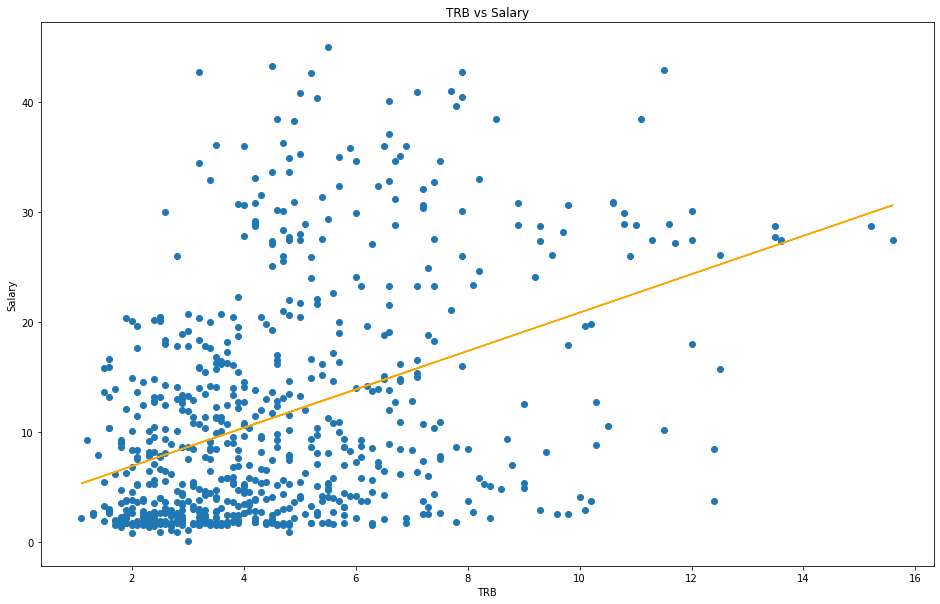

Linear Regression Slope (in Million $s per RPG increase) is: 1.75


In [ ]:
plt.figure(figsize=[16, 10]);
plt.scatter(x='TRB', y='Salary', data = test_data)
m, b = np.polyfit(test_data['TRB'], test_data['Salary'], 1) # regression line variables
plt.plot(test_data['TRB'], m*test_data['TRB']+b, color='orange') # plot linear regression line
plt.title("TRB vs Salary")
plt.xlabel("TRB")
plt.ylabel("Salary")
plt.show();
print("Linear Regression Slope (in Million $s per RPG increase) is:", round(m, 2))

What about rebounds per game for centers?

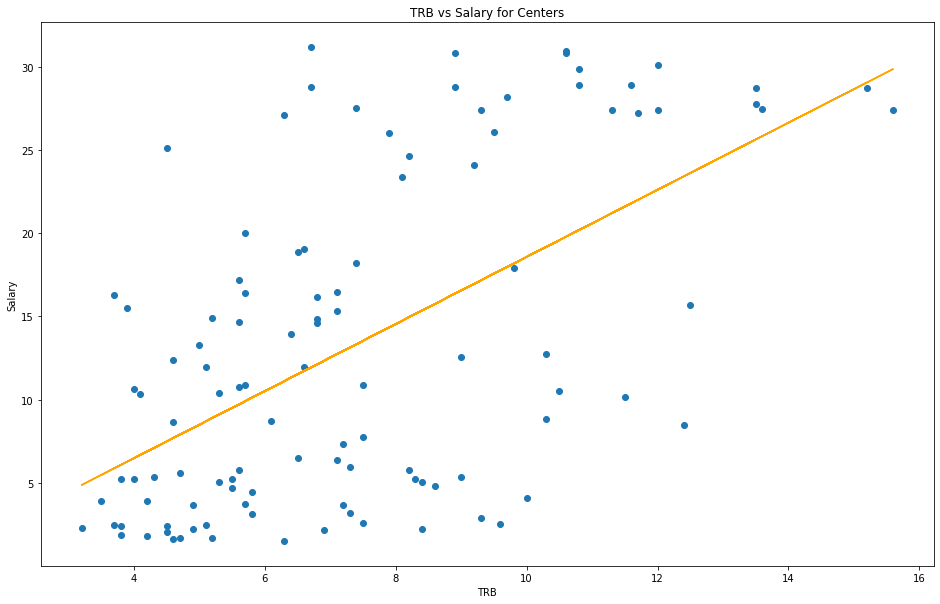

Linear Regression Slope (in Million $s per RPG increase) is: 2.02


In [ ]:
plt.figure(figsize=[16, 10]);
plt.scatter(x='TRB', y='Salary', data = test_data[test_data['Pos_C'] == 1])
m, b = np.polyfit(test_data[test_data['Pos_C'] == 1]['TRB'], test_data[test_data['Pos_C'] == 1]['Salary'], 1) # regression line variables
plt.plot(test_data[test_data['Pos_C'] == 1]['TRB'], m*test_data[test_data['Pos_C'] == 1]['TRB']+b, color='orange') # plot linear regression line
plt.title("TRB vs Salary for Centers")
plt.xlabel("TRB")
plt.ylabel("Salary")
plt.show();
print("Linear Regression Slope (in Million $s per RPG increase) is:", round(m, 2))

Seems as though the relationship is a bit stronger as expected!

Let's take a look at the relationship between MPG and Salary. Maybe we expect players that play a lot to be paid more.

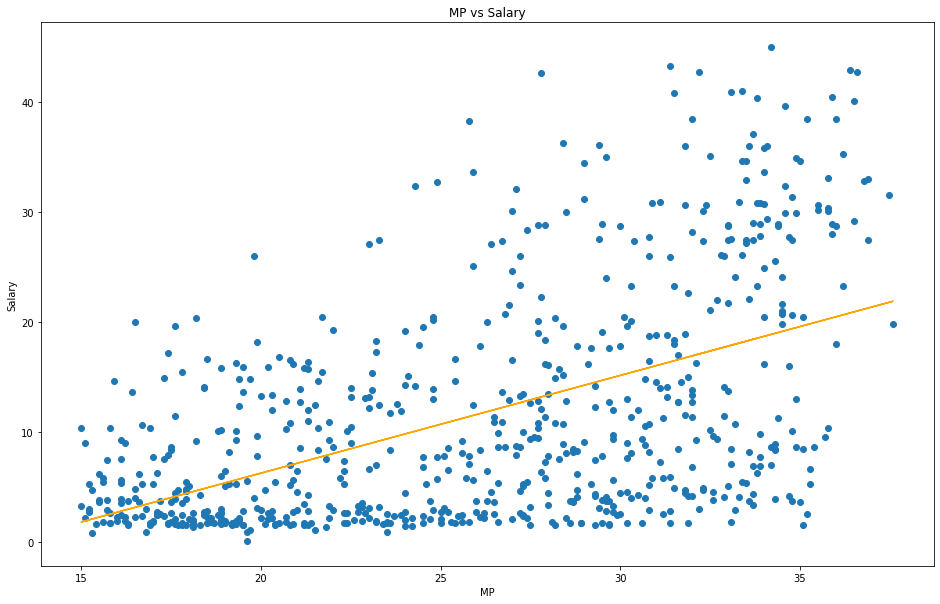

Linear Regression Slope (in Million $s per MP increase) is: 0.89


In [ ]:
plt.figure(figsize=[16, 10]);
plt.scatter(x='MP', y='Salary', data = test_data)
m, b = np.polyfit(test_data['MP'], test_data['Salary'], 1) # regression line variables
plt.plot(test_data['MP'], m*test_data['MP']+b, color='orange') # plot linear regression line
plt.title("MP vs Salary")
plt.xlabel("MP")
plt.ylabel("Salary")
plt.show();
print("Linear Regression Slope (in Million $s per MP increase) is:", round(m, 2))

Yikes, guess a lot of players play a lot just because their team has no better options, or star players rest quite a bit during the regular season.

**PREDICTIVE MODELING**

**1. Linear Regression** </br>
We will try to fit a linear model to describe the relationship between the dependent variable (Salary) and one or more indepedent variables (pergame statistics).

In [ ]:
lin_model = LinearRegression()

x_train = test_data.drop(columns=['Player', 'Salary'])
y_train = test_data['Salary']

lin_model.fit(x_train, y_train)

x_test = target_data.drop(columns=['Player', 'Salary'])
y_test = target_data['Salary']

y_pred_lin_reg = lin_model.predict(x_test)

lin_reg_results = target_data[['Player', 'Salary']]
lin_reg_results['Predicted Salary'] = y_pred_lin_reg.round(2)
lin_reg_results['Difference'] = lin_reg_results['Predicted Salary'] - lin_reg_results['Salary']

In [ ]:
print(x_train.columns[np.argmax(lin_model.coef_)], np.amax(lin_model.coef_))

FG% 21.60752043597674


In [ ]:
for pair in zip(x_train.columns, lin_model.coef_):
  if abs(pair[1]) > 2.0:
    print(pair)

('FG', 2.6193160199188696)
('FGA', 4.812568379550619)
('FG%', 21.60752043597674)
('3PA', -5.563841938020948)
('3P%', -5.049152243535941)
('2PA', -6.126266143545215)
('2P%', -5.240572830906293)
('eFG%', -44.13458191076357)
('ORB', 6.611547695679033)
('DRB', 7.348615983629076)
('TRB', -6.348198988160824)
('Pos_C', 3.444577483335655)
('Pos_SF', 2.3079143704676177)
('ATL', -3.4558917923477193)
('DAL', -3.0994424515851087)
('DEN', 2.0355716381813167)
('DET', 2.0662792437158615)
('GSW', 2.204949131961694)
('MIA', -2.247266886199172)
('POR', 3.178401603141596)
('SAC', -4.215813737077613)


Field goal % made had the greatest influence in this prediction model!


Undervalued players according to linear regression.

In [ ]:
lin_reg_results.sort_values(by='Difference', ascending=False).head(10)

,Player,Salary,Predicted Salary,Difference
14,Andre Iguodala,2.64169,24.63,21.98831
265,LaMarcus Aldridge,2.64169,18.94,16.29831
398,Trevor Ariza,2.64169,18.14,15.49831
91,DeMarcus Cousins,0.75911,15.76,15.00089
343,Rajon Rondo,2.64169,16.71,14.06831
52,Carmelo Anthony,2.64169,16.30,13.65831
369,Shai Gilgeous-Alexander,5.49553,18.98,13.48447
315,Nemanja Bjelica,2.08945,15.23,13.14055
278,Luka Dončić,10.17439,23.14,12.96561
13,Andre Drummond,2.40154,15.36,12.95846


Hmm, we have quite a few talented NBA veterans being paid the veterman minimum.

Overvalued players according to linear regression.

In [ ]:
lin_reg_results.sort_values(by='Difference', ascending=True).head(10)

,Player,Salary,Predicted Salary,Difference
360,Russell Westbrook,44.21115,23.94,-20.27115
27,Blake Griffin,32.40582,12.80,-19.60582
86,De'Aaron Fox,28.10355,11.11,-16.99355
391,Tobias Harris,36.00000,19.46,-16.54000
15,Andrew Wiggins,31.57939,15.67,-15.90939
210,John Collins,23.00000,7.23,-15.77000
259,Klay Thompson,37.98072,23.43,-14.55072
260,Kristaps Porziņģis,31.65060,18.70,-12.95060
69,D'Angelo Russell,30.01350,17.40,-12.61350
100,Derrick Jones Jr.,9.72090,-2.86,-12.58090


Westbrook just isn't who he once was 🧱. Same with Blake Griffin 😞.

Let's take a look at some popular names.

In [ ]:
popular = ['Stephen Curry', 'Klay Thompson', 'Russell Westbrook', 'LeBron James', 'Giannis Antetokounmpo']
for name in popular:
  display(lin_reg_results[lin_reg_results['Player'] == name])

,Player,Salary,Predicted Salary,Difference
373,Stephen Curry,45.78097,34.28,-11.50097


,Player,Salary,Predicted Salary,Difference
259,Klay Thompson,37.98072,23.43,-14.55072


,Player,Salary,Predicted Salary,Difference
360,Russell Westbrook,44.21115,23.94,-20.27115


,Player,Salary,Predicted Salary,Difference
272,LeBron James,41.18054,39.69,-1.49054


,Player,Salary,Predicted Salary,Difference
147,Giannis Antetokounmpo,39.34497,28.91,-10.43497


It seems as though our NBA superstars are all considered to be overvalued incorrectly, except perhaps Westbrook. This may be because superstars bring more to a team than what is reflected in our pergame statistics test data, such as LBJ's leadership or Giannis's defensive impact. 

Let's take a look at some notable role players as role players are more common than superstars.

In [ ]:
role_players = ['Alex Caruso', 'Danny Green', 'Otto Porter Jr.', 'Derrick White', 'Spencer Dinwiddie']
for name in role_players:
  display(lin_reg_results[lin_reg_results['Player'] == name])

,Player,Salary,Predicted Salary,Difference
8,Alex Caruso,8.60465,8.77,0.16535


,Player,Salary,Predicted Salary,Difference
79,Danny Green,10.0,12.82,2.82


,Player,Salary,Predicted Salary,Difference
326,Otto Porter Jr.,2.38964,11.88,9.49036


,Player,Salary,Predicted Salary,Difference
102,Derrick White,15.17857,13.93,-1.24857


,Player,Salary,Predicted Salary,Difference
371,Spencer Dinwiddie,17.14286,16.73,-0.41286


These are more accurate! Alex Caruso's salary was predicted spot on, however Otto Porter Jr. was heavily underpaid. I guess he did pop off for the Warriors last year.


In [ ]:
lin_model_rmse = mean_squared_error(y_test, y_pred_lin_reg, squared=False) 
print("RMSE:", lin_model_rmse)
lin_model_mae = mean_absolute_error(y_test, y_pred_lin_reg) 
print("MAE:", lin_model_mae)

RMSE: 6.627401948433925
MAE: 5.217897556288782


Errors histogram.

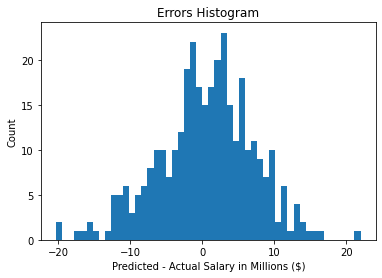

In [ ]:
plt.hist(lin_reg_results['Difference'], bins=50);
plt.xlabel('Predicted - Actual Salary in Millions ($)');
plt.ylabel('Count');
plt.title('Errors Histogram');

Let's try some other techniques and see if we can do better in terms of Root Mean Squared Error and Mean Absolute Error.

**2. CART (Classification and Regression Tree)** </br>
Essentially Decision Trees that work for continuous variables! The predicted value is chosen at the lowest MSE point.

Train our model.

In [ ]:
clf = tree.DecisionTreeRegressor(max_depth=4, criterion='friedman_mse')
cart = clf.fit(x_train, y_train)

Predict salaries.

In [ ]:
y_pred_cart = cart.predict(x_test)
cart_results = target_data[['Player', 'Salary']]
cart_results['Predicted Salary'] = y_pred_cart.round(2)
cart_results['Difference'] = cart_results['Predicted Salary'] - cart_results['Salary']

Visualize the decision tree.

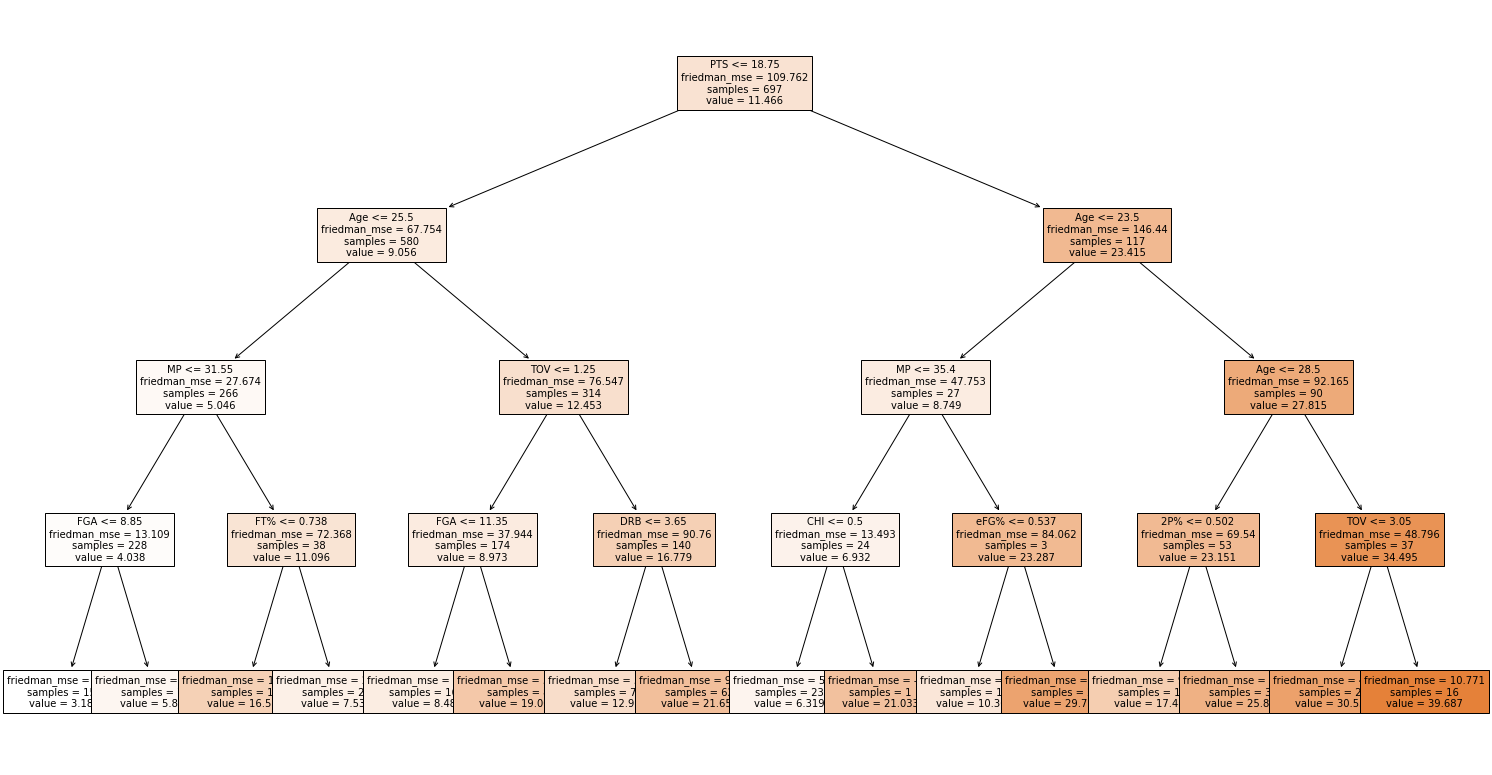

In [ ]:
fig, ax = plt.subplots(figsize=(26, 14))
tree.plot_tree(clf, fontsize=10, feature_names=x_train.columns, filled=True); 

Undervalued players according to linear regression.

In [ ]:
cart_results.sort_values(by='Difference', ascending=False).head(10)

,Player,Salary,Predicted Salary,Difference
303,Miles Bridges,5.42149,29.75,24.32851
91,DeMarcus Cousins,0.75911,21.66,20.90089
177,Jae'Sean Tate,1.51798,21.66,20.14202
13,Andre Drummond,2.40154,21.66,19.25846
29,Bobby Portis,4.34760,21.66,17.31240
173,JaVale McGee,5.00000,21.66,16.66000
293,Mason Plumlee,8.13750,21.66,13.52250
180,Jakob Poeltl,8.75000,21.66,12.91000
268,Lance Stephenson,0.92473,12.90,11.97527
411,Victor Oladipo,2.38964,12.90,10.51036


Miles Bridges also raps. 🔥

Overvalued players according to carts.

In [ ]:
cart_results.sort_values(by='Difference', ascending=True).head(10)

,Player,Salary,Predicted Salary,Difference
27,Blake Griffin,32.40582,8.49,-23.91582
360,Russell Westbrook,44.21115,21.66,-22.55115
69,D'Angelo Russell,30.01350,7.53,-22.48350
15,Andrew Wiggins,31.57939,12.90,-18.67939
5,Al Horford,27.00000,8.49,-18.51000
199,Jayson Tatum,28.10355,10.36,-17.74355
226,Jrue Holiday,30.13333,12.90,-17.23333
210,John Collins,23.00000,5.85,-17.15000
391,Tobias Harris,36.00000,21.66,-14.34000
358,Rudy Gobert,35.34483,21.66,-13.68483


Blake Griffin was 2nd for the linear regression model too 👀, maybe he really is overvalued.

Let's take a look at some popular names.

In [ ]:
popular = ['Stephen Curry', 'Klay Thompson', 'Russell Westbrook', 'LeBron James', 'Giannis Antetokounmpo']
for name in popular:
  display(cart_results[cart_results['Player'] == name])

,Player,Salary,Predicted Salary,Difference
373,Stephen Curry,45.78097,39.69,-6.09097


,Player,Salary,Predicted Salary,Difference
259,Klay Thompson,37.98072,30.54,-7.44072


,Player,Salary,Predicted Salary,Difference
360,Russell Westbrook,44.21115,21.66,-22.55115


,Player,Salary,Predicted Salary,Difference
272,LeBron James,41.18054,39.69,-1.49054


,Player,Salary,Predicted Salary,Difference
147,Giannis Antetokounmpo,39.34497,25.83,-13.51497


These players are all still overvalued by the model, just like our linear regression model. This could again be explained by their worth in other features that our pergame statistics dataset does not consider. For example, consider the impact of Stephen Curry's 3pt shooting ability, and how it generates more opportunities for his teammates. This is not something measurable by our simple pergame statistics dataset.

Some more role players.

In [ ]:
role_players = ['Alex Caruso', 'Danny Green', 'Otto Porter Jr.', 'Derrick White', 'Spencer Dinwiddie']
for name in role_players:
  display(cart_results[cart_results['Player'] == name])

,Player,Salary,Predicted Salary,Difference
8,Alex Caruso,8.60465,12.9,4.29535


,Player,Salary,Predicted Salary,Difference
79,Danny Green,10.0,8.49,-1.51


,Player,Salary,Predicted Salary,Difference
326,Otto Porter Jr.,2.38964,8.49,6.10036


,Player,Salary,Predicted Salary,Difference
102,Derrick White,15.17857,12.9,-2.27857


,Player,Salary,Predicted Salary,Difference
371,Spencer Dinwiddie,17.14286,12.9,-4.24286


Role players seem to more inaccurate now, why is that? Otto Porter Jr. still popped off tho!

In [ ]:
cart_model_rmse = mean_squared_error(y_test, y_pred_cart, squared=False) 
print("RMSE:", cart_model_rmse)
cart_model_mae = mean_absolute_error(y_test, y_pred_cart) 
print("MAE:", cart_model_mae)

RMSE: 6.292663410582768
MAE: 4.466663866552526


Errors histogram.

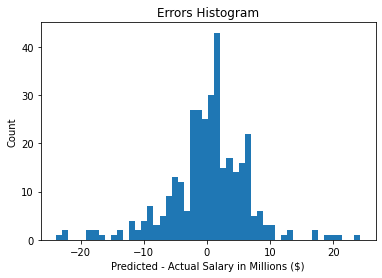

In [ ]:
plt.hist(cart_results['Difference'], bins=50);
plt.xlabel('Predicted - Actual Salary in Millions ($)');
plt.ylabel('Count');
plt.title('Errors Histogram');

It seems as though the RMSE and MAE of the CART model is a bit better than the Linear Regression Model. Let's try one more technique to see if we can do better.

**ADA Boost** </br>
Adaptive Boosting, which takes the CART model we used earlier and improves it by adjusting weights of features to iteratively improve prediction on more difficult cases.

Train our model. (Depth 8 seems to provide an optimal RMSE minimization)

In [ ]:
reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                          n_estimators=500)
adaboost = reg.fit(x_train, y_train)

Predict salaries.

In [ ]:
y_pred_adaboost = adaboost.predict(x_test)
adaboost_results = target_data[['Player', 'Salary']]
adaboost_results['Predicted Salary'] = y_pred_adaboost.round(2)
adaboost_results['Difference'] = adaboost_results['Predicted Salary'] - adaboost_results['Salary']

Undervalued players according to linear regression.

In [ ]:
adaboost_results.sort_values(by='Difference', ascending=False).head(10)

,Player,Salary,Predicted Salary,Difference
91,DeMarcus Cousins,0.75911,15.71,14.95089
13,Andre Drummond,2.40154,14.85,12.44846
265,LaMarcus Aldridge,2.64169,14.47,11.82831
268,Lance Stephenson,0.92473,12.66,11.73527
14,Andre Iguodala,2.64169,14.31,11.66831
180,Jakob Poeltl,8.75000,19.65,10.90000
52,Carmelo Anthony,2.64169,13.29,10.64831
212,Jonas Valančiūnas,14.00000,24.49,10.49000
236,Keifer Sykes,0.55834,10.59,10.03166
419,Willy Hernangómez,2.32722,12.25,9.92278


Like the linear regression model, we have quite a few NBA vets with the veteran minimum up there. 😯

Overvalued players according to linear regression.

In [ ]:
adaboost_results.sort_values(by='Difference', ascending=True).head(10)

,Player,Salary,Predicted Salary,Difference
27,Blake Griffin,32.40582,8.72,-23.68582
69,D'Angelo Russell,30.01350,11.10,-18.91350
15,Andrew Wiggins,31.57939,14.87,-16.70939
210,John Collins,23.00000,6.58,-16.42000
259,Klay Thompson,37.98072,23.37,-14.61072
250,Kevin Love,31.30000,17.34,-13.96000
141,Gary Harris,20.48214,8.01,-12.47214
147,Giannis Antetokounmpo,39.34497,27.73,-11.61497
260,Kristaps Porziņģis,31.65060,20.22,-11.43060
193,Jarrett Allen,20.00000,8.60,-11.40000


Blake Griffin is in the top 2 for all 3 models. Surely, this means... 😆

Let's take a look at some popular names.

In [ ]:
popular = ['Stephen Curry', 'Klay Thompson', 'Russell Westbrook', 'LeBron James', 'Giannis Antetokounmpo']
for name in popular:
  display(adaboost_results[adaboost_results['Player'] == name])

,Player,Salary,Predicted Salary,Difference
373,Stephen Curry,45.78097,40.81,-4.97097


,Player,Salary,Predicted Salary,Difference
259,Klay Thompson,37.98072,23.37,-14.61072


,Player,Salary,Predicted Salary,Difference
360,Russell Westbrook,44.21115,32.92,-11.29115


,Player,Salary,Predicted Salary,Difference
272,LeBron James,41.18054,39.63,-1.55054


,Player,Salary,Predicted Salary,Difference
147,Giannis Antetokounmpo,39.34497,27.73,-11.61497


Guess we really need more features for some of the intangibles to have better predictions for superstars!

Some more role players.

In [ ]:
role_players = ['Alex Caruso', 'Danny Green', 'Otto Porter Jr.', 'Derrick White', 'Spencer Dinwiddie']
for name in role_players:
  display(adaboost_results[adaboost_results['Player'] == name])

,Player,Salary,Predicted Salary,Difference
8,Alex Caruso,8.60465,12.66,4.05535


,Player,Salary,Predicted Salary,Difference
79,Danny Green,10.0,11.02,1.02


,Player,Salary,Predicted Salary,Difference
326,Otto Porter Jr.,2.38964,8.63,6.24036


,Player,Salary,Predicted Salary,Difference
102,Derrick White,15.17857,13.25,-1.92857


,Player,Salary,Predicted Salary,Difference
371,Spencer Dinwiddie,17.14286,16.03,-1.11286


Seems just a bit better than CART, very accurate once again except for Otto.

In [ ]:
adaboost_model_rmse = mean_squared_error(y_test, y_pred_adaboost, squared=False) 
print("RMSE:", adaboost_model_rmse)
adaboost_model_mae = mean_absolute_error(y_test, y_pred_adaboost) 
print("MAE:", adaboost_model_mae)

RMSE: 5.237457552958177
MAE: 3.9592784122015123


Lowest RMSE and MAE error of the 3 

---

models we tried! Is this the best?

Errors histogram.

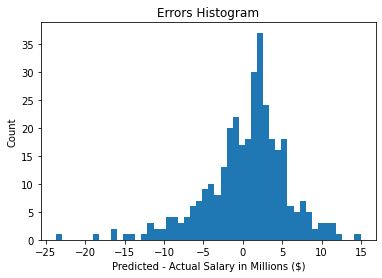

In [ ]:
plt.hist(adaboost_results['Difference'], bins=50);
plt.xlabel('Predicted - Actual Salary in Millions ($)');
plt.ylabel('Count');
plt.title('Errors Histogram');

*Feel free to go back and take a look at the predicted versus actual salaries of more specific players.

**ENDING CONSIDERATIONS**

Q: How can we improve our model by adding features? What features does our model fail to recognize that may be important in predicting salaries? </br> Think of features like player recognition (translates to ticket sales/fan attendance, jersey sales, media hype), intangibles (Steph Curry's 3pt shooting/impact on spreading the floor, Giannis's leadership, etc.), team value (salary cap space, small/big market team), and team standings (is a team tanking? meaning they have young players playing more minutes and scoring more but not necessarily worth big contracts).

Q: How can we improve our model by processing our data differently? </br>
Should we filter out by >= 15.0 MP? Or something else? Are there any features that could be filtered for? Should we have adjusted for inflation differently? Should we use more data from previous years?

Q: What other models could we try? </br>
Ideas could be Random Forests, Neural Networks, etc.